In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('kyphosis.csv')

In [3]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [5]:
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


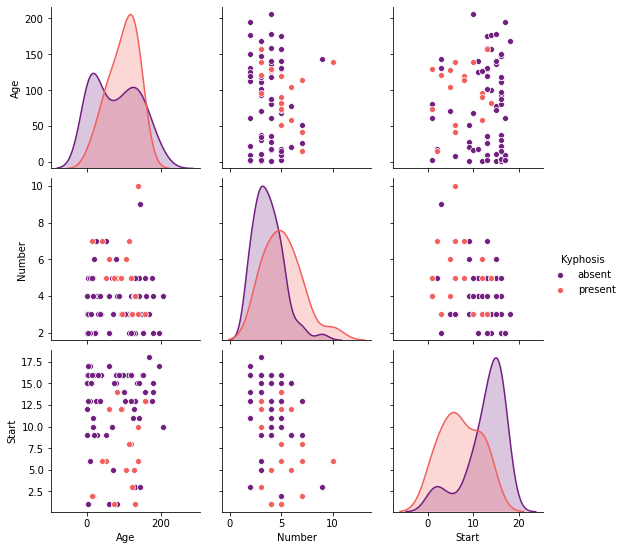

In [6]:
sns.pairplot(df, hue='Kyphosis', palette='magma')

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = df.drop(columns=['Kyphosis'])
y = df['Kyphosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
dtree = DecisionTreeClassifier()

In [11]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [12]:
pred = dtree.predict(X_test)

In [13]:
from sklearn.metrics import classification_report, confusion_matrix

In [14]:
print(confusion_matrix(y_test, pred))

[[13  4]
 [ 5  3]]


In [15]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

      absent       0.72      0.76      0.74        17
     present       0.43      0.38      0.40         8

    accuracy                           0.64        25
   macro avg       0.58      0.57      0.57        25
weighted avg       0.63      0.64      0.63        25



In [16]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
rfc = RandomForestClassifier(n_estimators=200)

In [22]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [23]:
rfc_pred = rfc.predict(X_test)

In [24]:
print(confusion_matrix(y_test, rfc_pred))

[[15  2]
 [ 6  2]]


In [25]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

      absent       0.71      0.88      0.79        17
     present       0.50      0.25      0.33         8

    accuracy                           0.68        25
   macro avg       0.61      0.57      0.56        25
weighted avg       0.65      0.68      0.64        25



In [26]:
df['Kyphosis'].value_counts()

absent     64
present    17
Name: Kyphosis, dtype: int64